## **<h3 style="color:red;"> Customer Churn Prediction** 

<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Introduction**</span>

</div>


# What is Customer Churn?

Customer churn occurs when customers stop using a company's service. In the telecom industry, churn is common due to many available alternatives.  

This notebook explores customer data, identifies factors that influence churn, and builds machine learning models to predict which customers are at risk of leaving. The goal is to help companies focus retention efforts on high-risk customers and improve overall profitability.

## Objectives

In this notebook, I will explore the data and try to answer questions such as:

- What percentage of customers churn vs. remain active?  
- Are there any patterns in churn based on gender?  
- Are there preferences or trends in churn based on the type of service provided?  
- Which service types are the most profitable?  
- Which features or services drive the most revenue?  
- And other insights that may arise during the analysis.


<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Importing libraries and Loading the data**</span>

</div>


In [2]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [78]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [206]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [209]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [208]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [207]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

The data set includes information about:

Customers who left within the last month, the column is called Churn.

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

Customer account information, how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

Demographic info about customers, gender, age range, and if they have partners and dependents.

<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Dataset Exploration**</span>

</div>


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [83]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [84]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### **Churn Class Distribution & Imbalance Check**

I examine the number of customers who churned versus those who stayed to see if the classes are balanced. 

Class imbalance can affect the performance of machine learning models.


In [ ]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [86]:
print(df['Churn'].nunique()) # must be <10 for classification

2


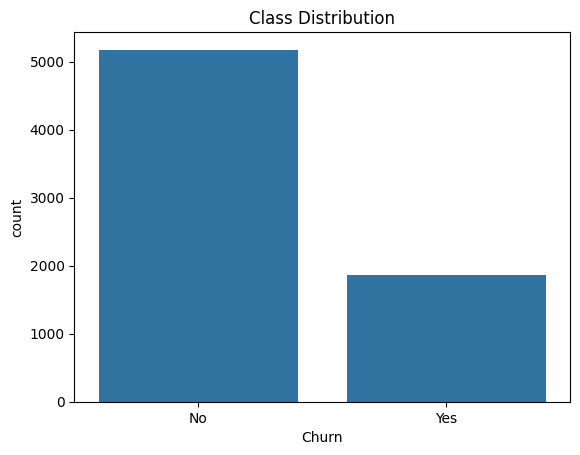

In [87]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.countplot(x='Churn',data=df)
plt.title('Class Distribution')
plt.show()

#### **Splitting the data into training and testing sets**

In [88]:
# split he data into features and target variable
X = df.drop('Churn', axis=1)
y= df['Churn']

In [89]:
# split he data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y , random_state=42)

In [90]:
# Check imbalances in train and test sets
print(y_train.value_counts(normalize=True))

Churn
No     0.734647
Yes    0.265353
Name: proportion, dtype: float64


#### **Checking data types of features**

In [92]:
print(X_train.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object


In [93]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### **Converting 'TotalCharges' to numeric and handling missing values**

In [94]:
# Convert to float, coerce errors to NaN
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

# Fill missing values (from conversion errors)
X_train['TotalCharges'].fillna(0, inplace=True)
X_test['TotalCharges'].fillna(0, inplace=True)


In [95]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **Encoding Categorical Variables** 

- Identify categorical columns.
- Apply one-hot encoding (get_dummies) to convert categorical features into numeric.
- Ensure test set has same columns as training set.

In [96]:
categorical_cols = X_train.select_dtypes(include='object').columns

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

# Make sure test set has same columns as training
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


#### **Handling Class Imbalance & Modeling**

- Use SMOTE to oversample minority class in the training set.
- Train Logistic Regression with balanced class weights.
- Evaluate model performance using classification report on test set.

In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_encoded, y_train)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1035
         Yes       0.61      0.56      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



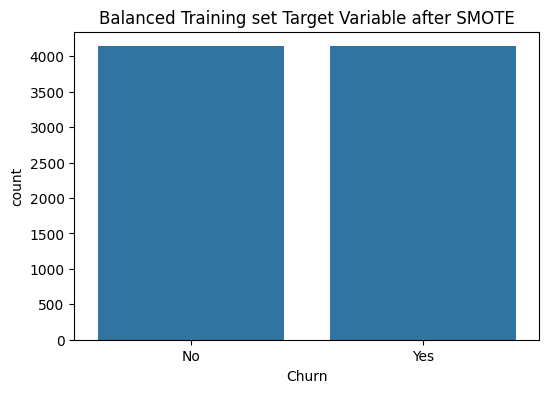

In [98]:
# optional visualize class balance after smote
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_sm)
plt.title('Balanced Training set Target Variable after SMOTE')
plt.show()


#### **Visualize missing values**

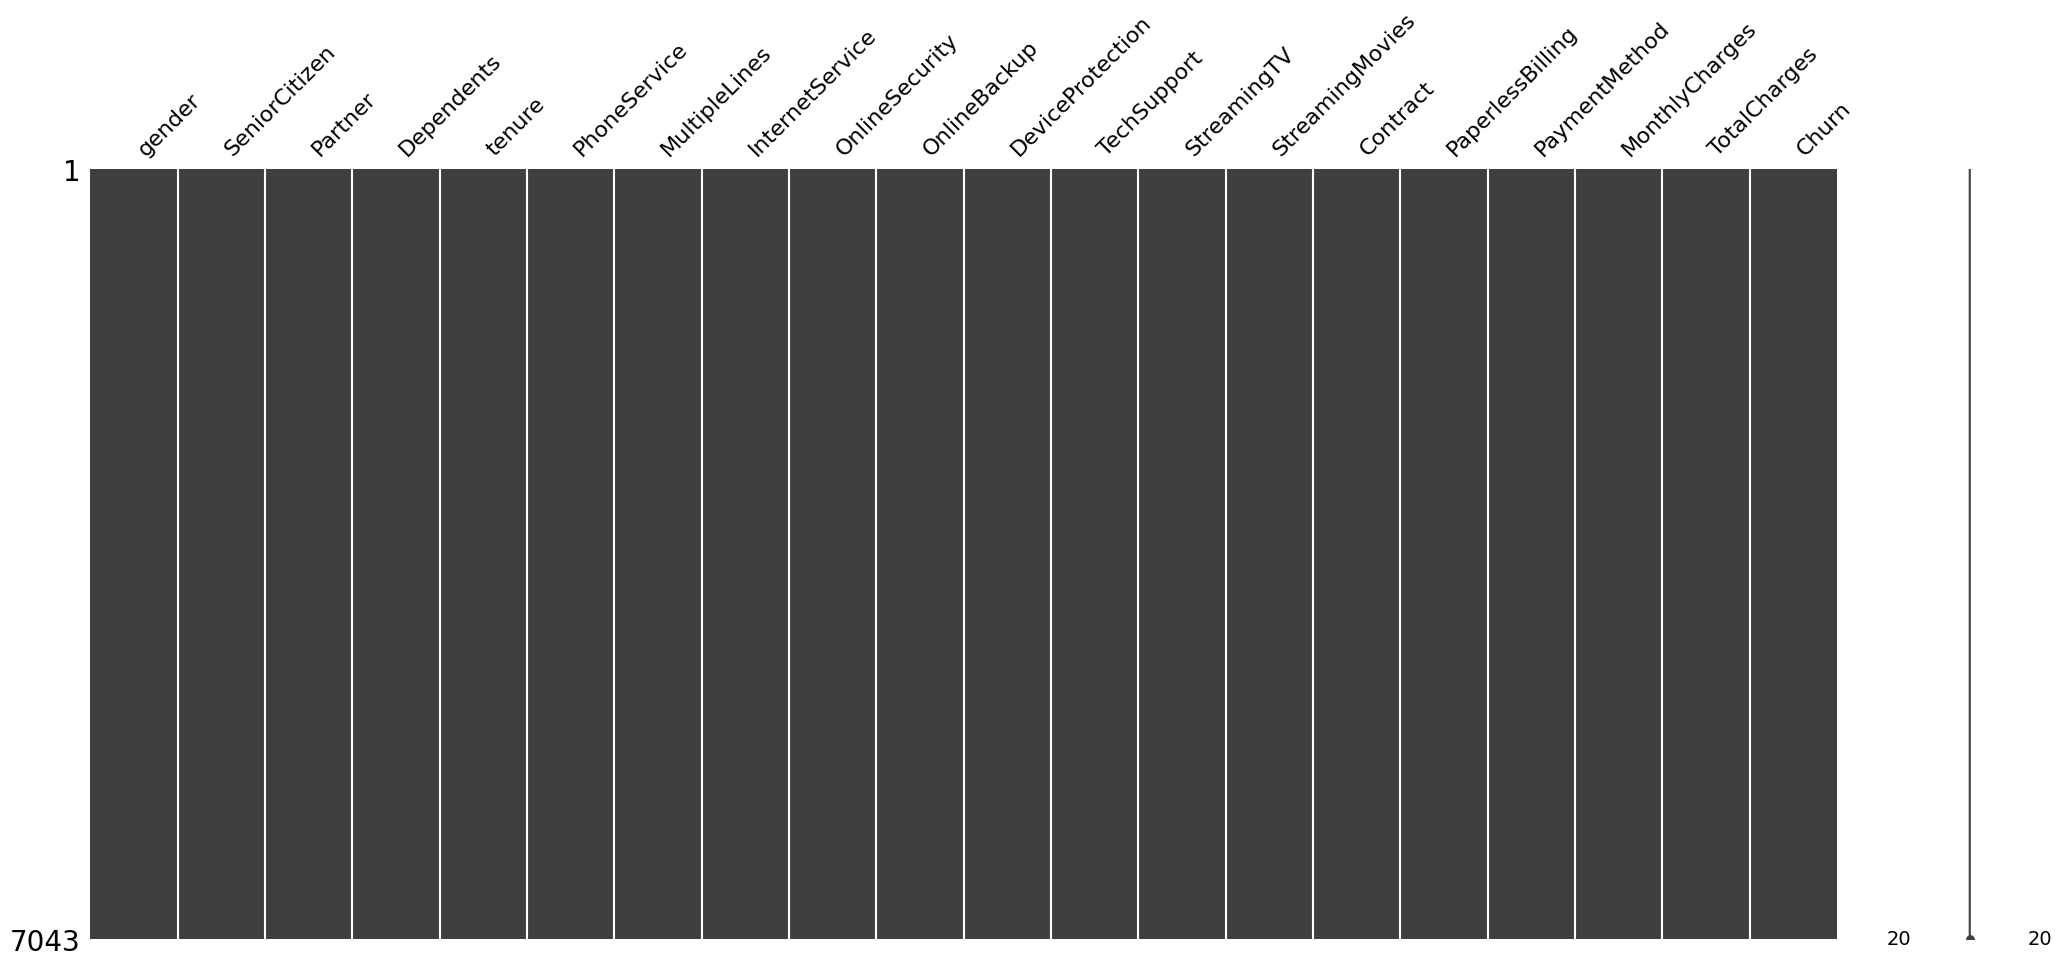

In [99]:
# Visualize missing values as a matrix
msno.matrix(df);

Using this matrix we can very quickly find the pattern of missingness in the dataset.

From the above visualisation we can observe that it has no peculiar pattern that stands out. 

In fact there is no missing data.

#### **Data Manipulation**

In [211]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [101]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [212]:
# Convert to float, invalid parsing will become NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Here we see that the TotalCharges has 11 missing values. 

Let's check this data.

In [213]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

Let's see if there are any other 0 values in the tenure column.

In [214]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- There are no additional missing values in the Tenure column.

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [107]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

- To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [108]:
df.fillna(df["TotalCharges"].mean())


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [109]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [215]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [110]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [111]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Data visualization**</span>

</div>


In [114]:
g_labels = df['gender'].unique()
c_labels = df['Churn'].unique()

In [115]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

26.6 % of customers switched to another firm.

Customers are 49.5 % female and 50.5 % male

In [119]:
df['Churn'][df['Churn']=='No'].groupby(by=df['gender']).count()


gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [120]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [121]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

<Figure size 600x600 with 0 Axes>

(np.float64(-11.244621506364078),
 np.float64(11.24460078391538),
 np.float64(-11.22144518698909),
 np.float64(11.221489296777571))

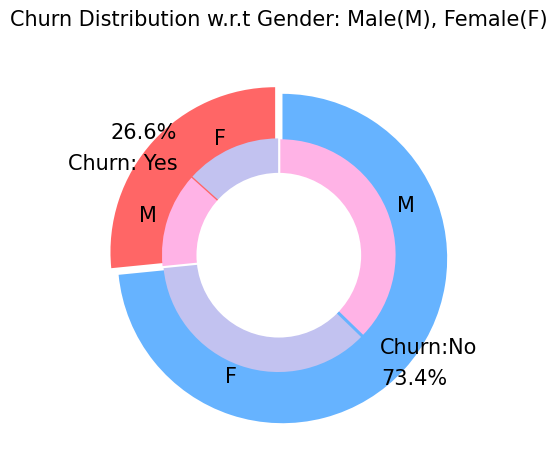

In [122]:
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')

- There is negligible difference in customer percentage/ count who chnaged the service provider. 

- Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [123]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [124]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [125]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Major customers who moved out were having Electronic Check as Payment Method.

- Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [126]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [127]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [128]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [129]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [130]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

- A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

- Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [131]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Customers without dependents are more likely to churn

In [132]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Customers that doesn't have partners are more likely to churn

In [133]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- It can be observed that the fraction of senior citizen is very less.

- Most of the senior citizens churn.

In [134]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Most customers churn in the absence of online security.

In [135]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Customers with Paperless Billing are most likely to churn.

In [136]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Customers with no TechSupport are most likely to migrate to another service provider.

In [137]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

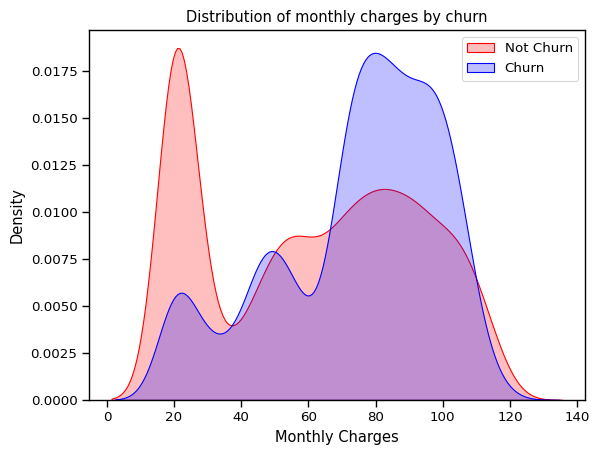

In [138]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

- Customers with higher Monthly Charges are also more likely to churn

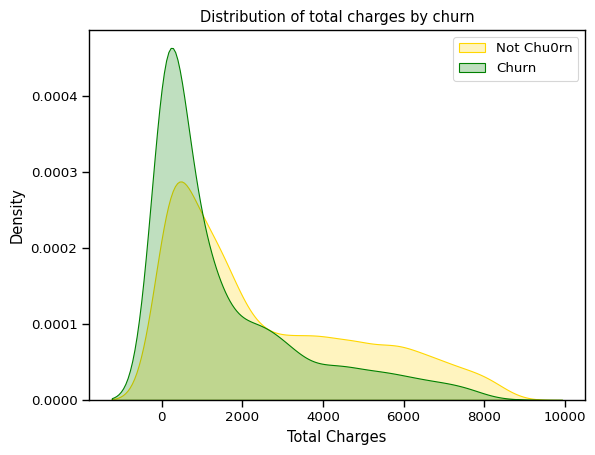

In [139]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [140]:

fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

- New customers are more likely to churn

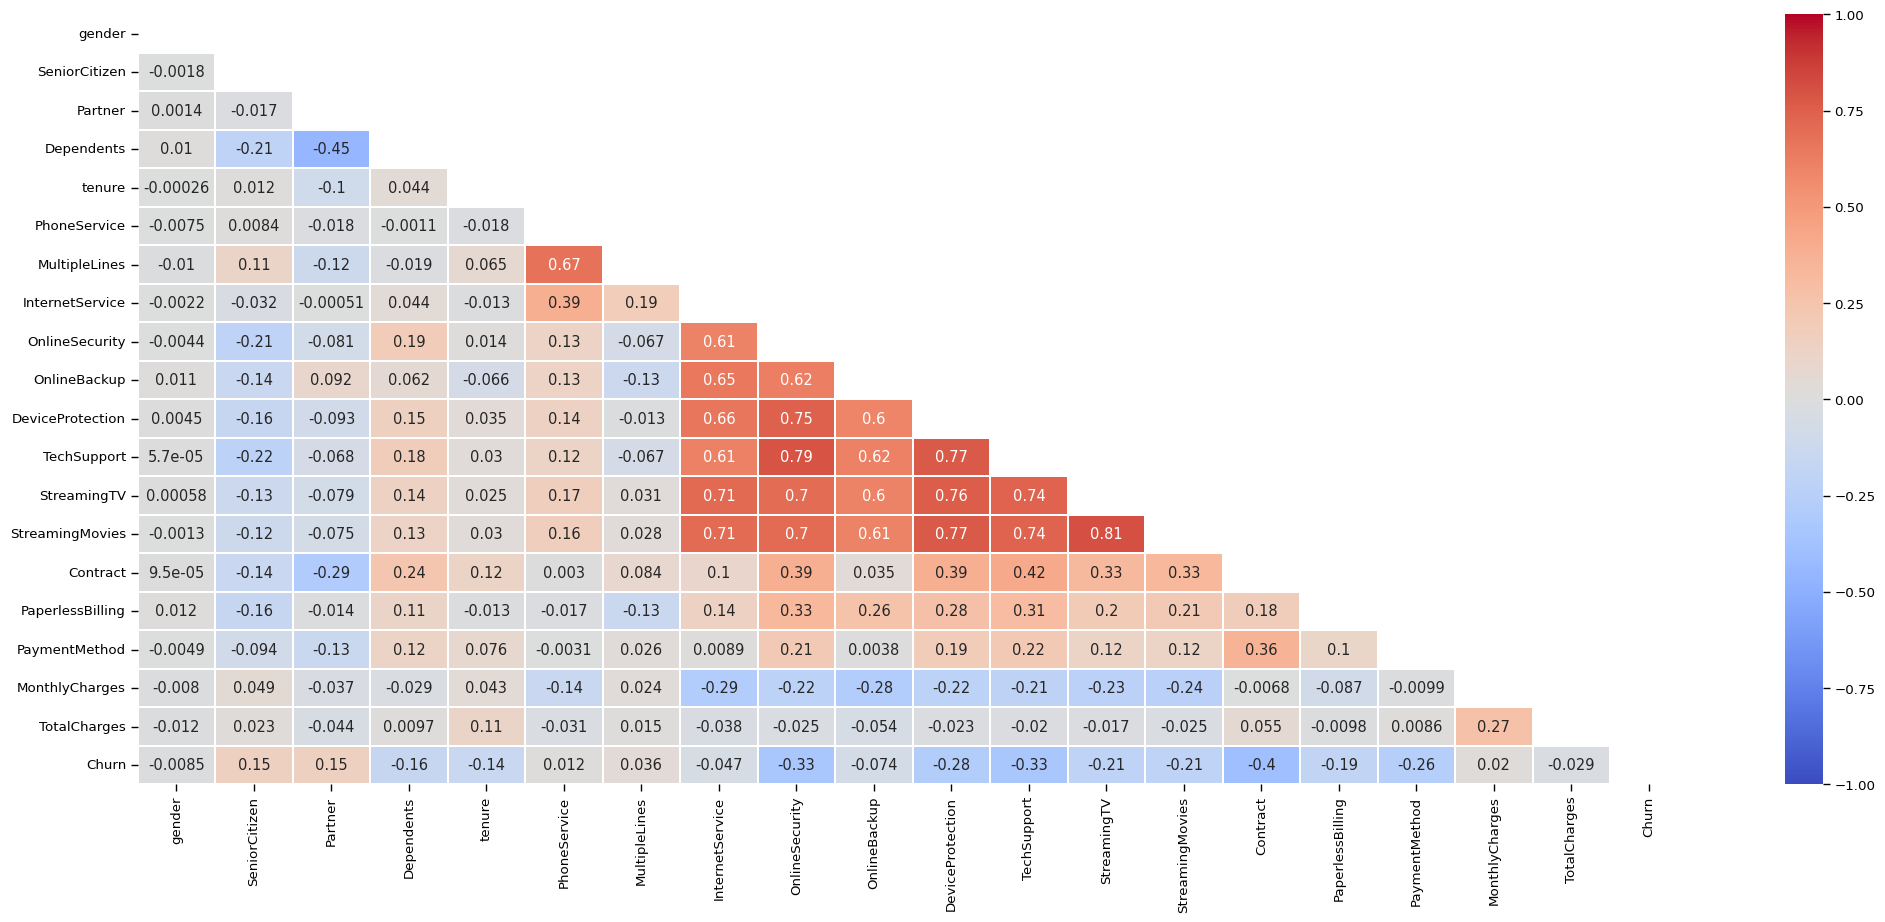

In [142]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Data Preprocessing**</span>

</div>


In [147]:
def object_to_int(dataframe_series):
    if dataframe_series.dtypes=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
        return dataframe_series

In [148]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,None,1,0,None,0,1,0,0,2,0,0,0,0,0,1,2,None,None,0
1,1,None,0,0,None,1,0,0,2,0,2,0,0,0,1,0,3,None,None,0
2,1,None,0,0,None,1,0,0,2,2,0,0,0,0,0,1,3,None,None,1
3,1,None,0,0,None,0,1,0,2,0,2,2,0,0,1,0,0,None,None,0
4,0,None,0,0,None,1,0,1,0,0,0,0,0,0,0,1,2,None,None,1


In [149]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
PaperlessBilling    0.191454
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TechSupport        -0.282232
OnlineSecurity     -0.289050
Contract           -0.396150
SeniorCitizen            NaN
tenure                   NaN
MonthlyCharges           NaN
TotalCharges             NaN
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [150]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [161]:
df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None


In [165]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [166]:
df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [168]:
df['TotalCharges'].isna().sum()

np.int64(0)

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

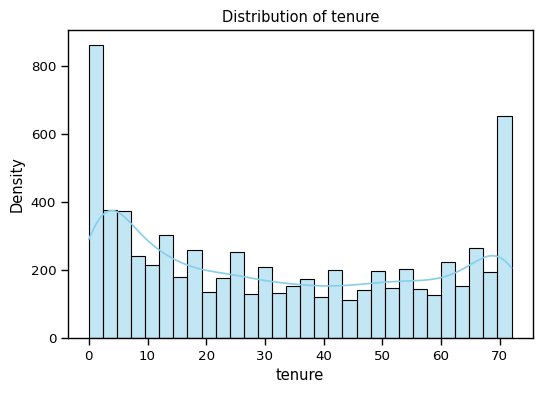

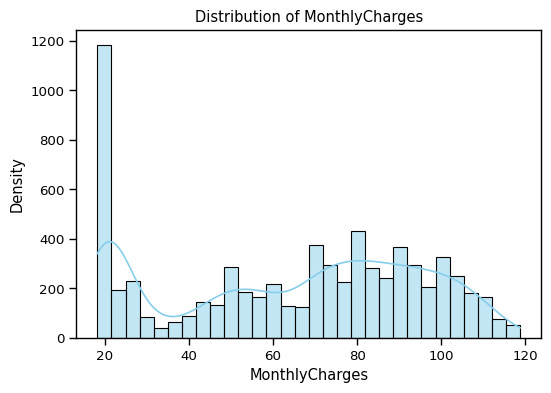

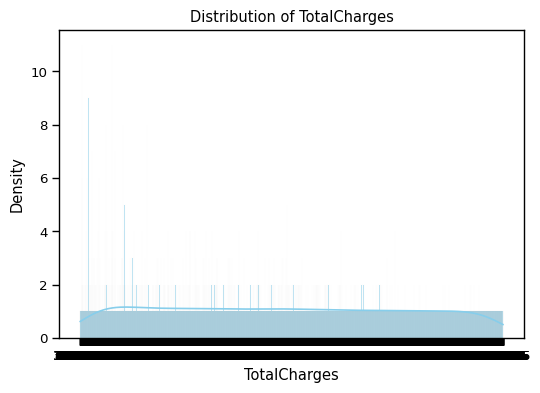

In [174]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for feat in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feat], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {feat}")
    plt.xlabel(feat)
    plt.ylabel("Density")
    plt.show()


- Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

#### **Standarizating numeric attributes**

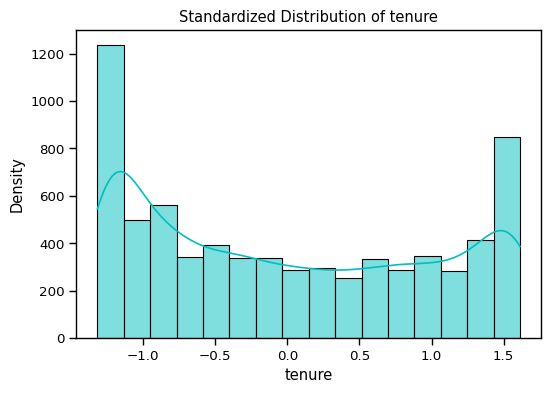

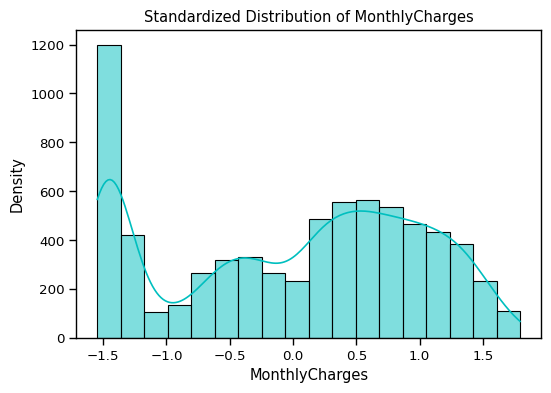

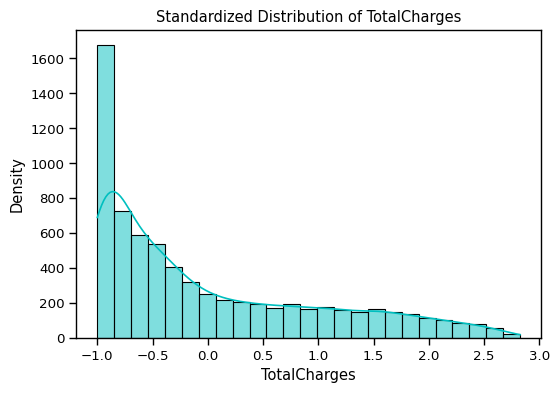

In [176]:
# Replace blank spaces with NaN and convert columns to float
df[num_cols] = df[num_cols].replace(' ', np.nan).astype(float)

# Drop or fill missing values if any (drop is simpler)
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Now safely standardize the numeric columns
from sklearn.preprocessing import StandardScaler
df_std = pd.DataFrame(
    StandardScaler().fit_transform(df[num_cols]),
    columns=num_cols
)

# Visualize standardized distributions
import seaborn as sns
import matplotlib.pyplot as plt

for feat in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_std[feat], kde=True, color='c')
    plt.title(f"Standardized Distribution of {feat}")
    plt.xlabel(feat)
    plt.ylabel("Density")
    plt.show()


In [177]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [178]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Machine Learning Model Evaluations and Predictions**</span>

</div>


#### **KNN**

In [180]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN with the mean (for numeric columns)
imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both train & test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now fit the model safely
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)

print("✅ KNN Accuracy:", round(accuracy_knn, 4))


✅ KNN Accuracy: 0.7555


In [181]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7554502369668247


In [182]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1549
           1       0.55      0.44      0.49       561

    accuracy                           0.76      2110
   macro avg       0.68      0.65      0.66      2110
weighted avg       0.74      0.76      0.75      2110



#### **SVC**

In [217]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("✅ SVM accuracy is :",accuracy_svc)

✅ SVM accuracy is : 0.7815165876777251


In [216]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.46      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



#### **Random forest**

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier(
    n_estimators=500,
    oob_score=True,
    n_jobs=-1,
    random_state=50,
    max_features="sqrt",   # changed from "auto"
    max_leaf_nodes=30
)

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

# Evaluate accuracy
print("✅ Random Forest Accuracy:", metrics.accuracy_score(y_test, prediction_test))


✅ Random Forest Accuracy: 0.7876777251184834


In [187]:
print(classification_report(y_test, prediction_test))


              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1549
           1       0.67      0.40      0.50       561

    accuracy                           0.79      2110
   macro avg       0.74      0.67      0.68      2110
weighted avg       0.77      0.79      0.77      2110



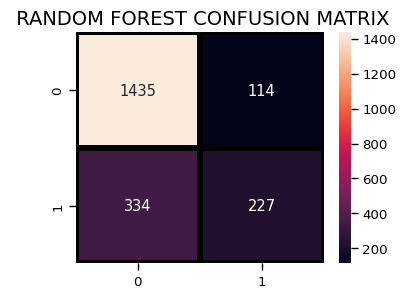

In [188]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

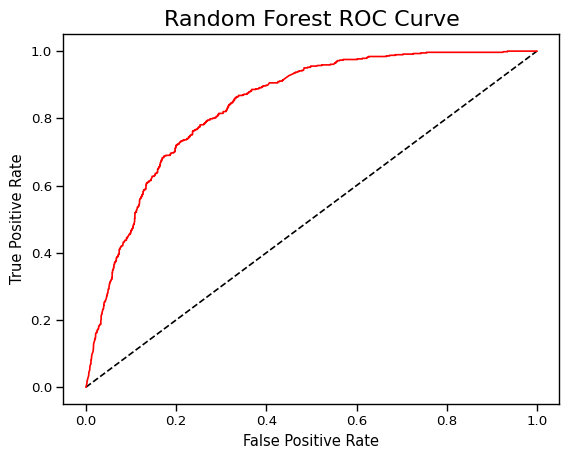

In [189]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

#### **Logistic Regression**

In [219]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("✅ Logistic Regression accuracy is :",accuracy_lr)

✅ Logistic Regression accuracy is : 0.7824644549763033


In [191]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



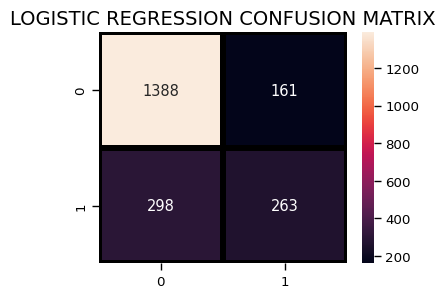

In [192]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

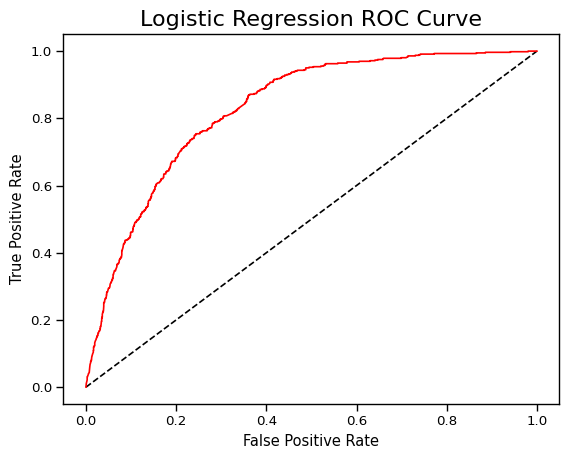

In [193]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

#### **Decision Tree Classifier**

In [220]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("✅ Decision Tree accuracy is :",accuracy_dt)

✅ Decision Tree accuracy is : 0.7180094786729858


- Decision tree gives very low score.

In [195]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1549
           1       0.48      0.46      0.47       561

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110



#### **AdaBoost Classifier**

In [221]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("✅ AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

✅ AdaBoost Classifier accuracy


0.785781990521327

In [197]:
print(classification_report(y_test, a_preds))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.61      0.53      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



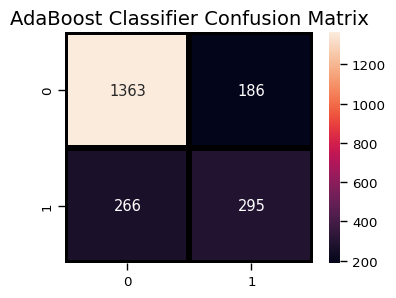

In [198]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

#### **Gradient Boosting Classifier**

In [222]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("✅ Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

✅ Gradient Boosting Classifier 0.7848341232227488


In [200]:
print(classification_report(y_test, gb_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.50      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



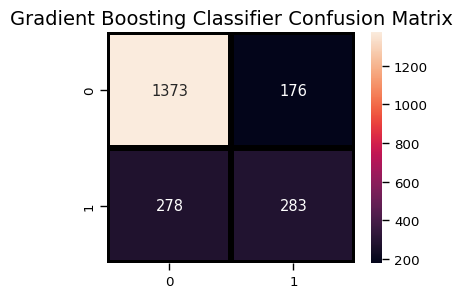

In [201]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

- Voting Classifier
Let's now predict the final model based on the highest majority of voting and check it's score

In [223]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("✅ Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

✅ Final Accuracy Score 
0.7919431279620853


In [203]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



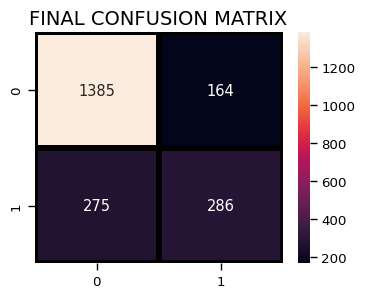

In [204]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

- From the confusion matrix we can see that: There are total 1385+164=1549
actual non-churn values and the algorithm predicts 1385 of them as non churn and 164 of them as churn. While there are 275+286=561 actual churn values and the algorithm predicts 275 of them as non churn values and 286 of them as churn values.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. 

The best way to avoid customer churn is for a company to truly know its customers. 

This includes identifying customers who are at risk of churning and working to improve their satisfaction. 

Improving customer service is, of course, at the top of the priority for tackling this issue. 

Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. 

Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.